In [6]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..")))
import pandas as pd
from scripts.sentiment_analysis import SentimentAnalysis
from langdetect import detect

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
df = pd.read_csv('../data/Dashen_cleaned.csv')
df.head()

,review_text,rating,date,bank_name,source
0,I like this mobile banking app very much. Over...,2,2025-06-07,Dashen Bank,Google Play
1,love,3,2025-06-06,Dashen Bank,Google Play
2,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play
3,wow,5,2025-06-03,Dashen Bank,Google Play
4,gadaa,5,2025-06-01,Dashen Bank,Google Play


### Sentiment Analysis

In [8]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'error'
# Add a column with detected language
df['language'] = df['review_text'].apply(detect_language)

# Count how many are English
english_count = (df['language'] == 'en').sum()
total_reviews = len(df)
print(f'Total: {total_reviews}, English:{english_count}')


Total: 449, English:314


In [9]:
df.head(10)

,review_text,rating,date,bank_name,source,language
0,I like this mobile banking app very much. Over...,2,2025-06-07,Dashen Bank,Google Play,en
1,love,3,2025-06-06,Dashen Bank,Google Play,sl
2,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play,error
3,wow,5,2025-06-03,Dashen Bank,Google Play,pl
4,gadaa,5,2025-06-01,Dashen Bank,Google Play,so
5,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,en
6,good,4,2025-05-31,Dashen Bank,Google Play,so
7,very good for this app,5,2025-05-31,Dashen Bank,Google Play,en
8,top,5,2025-05-31,Dashen Bank,Google Play,en
9,this app better than Amole . but the biometric...,4,2025-05-31,Dashen Bank,Google Play,en


In [10]:
sa = SentimentAnalysis(df)
sa.remove_amharic_rows()
sa.emoji_to_text()
sa.sentiment_analysis()

c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\sentiment_analysis.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['review_clean'] = self.df['review_text'].apply(convert_emoji_to_text)
c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\sentiment_analysis.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['sentiment'] = self.df['review_text'].apply(get_sentiment)


In [11]:
sa.df.head()

,review_text,rating,date,bank_name,source,language,review_clean,sentiment
0,I like this mobile banking app very much. Over...,2,2025-06-07,Dashen Bank,Google Play,en,I like this mobile banking app very much. Over...,0.333333
5,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,en,Massive upgrade from the Amole app.,0.000000
7,very good for this app,5,2025-05-31,Dashen Bank,Google Play,en,very good for this app,0.910000
8,top,5,2025-05-31,Dashen Bank,Google Play,en,top,0.500000
9,this app better than Amole . but the biometric...,4,2025-05-31,Dashen Bank,Google Play,en,this app better than Amole . but the biometric...,0.318182


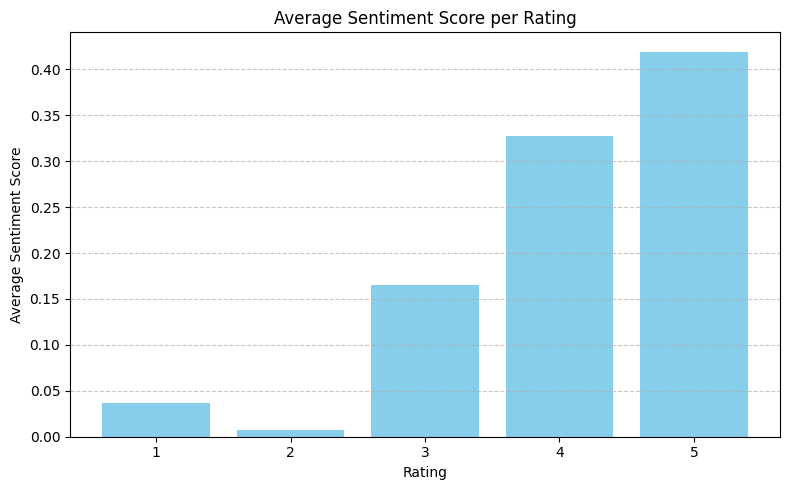

In [12]:
sa.plot_sentiment_by_rating()

### Thematic  Analysis

In [17]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch

# Method 1: Use pipeline (simplest)
classifier = pipeline(
    task="sentiment-analysis",
    model="distilbert/distilbert-base-uncased-finetuned-sst-2-english"
)

# Analyze text
results = classifier([
    "I love this movie! The acting was phenomenal.",
    "Terrible service. Worst experience ever."
])

# Print results
for result in results:
    print(f"Label: {result['label']}, Score: {result['score']:.4f}")

RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.